# Import

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the first 500000 observations of the dataset

In [71]:
df= pd.read_csv('train.csv', parse_dates=['pickup_datetime'], nrows=500000)

In [72]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [73]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


Initializing the geographical minimum and maximum latitudes and longitudes

In [74]:
# Longitudinal Range
min_long= -74.05
max_long= -73.75

In [75]:
# Latitudinal Range
min_lat= 40.63
max_lat= 40.85

In [76]:
df1= df.copy(deep= True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    df1= df1[(df1[long]> min_long) & (df1[long]< max_long)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df1= df1[(df1[lat]> min_lat) & (df1[lat]< max_lat)]

In [77]:
# Main Districts in New York City

landmarks = { 'JFK Airport': (-73.78, 40.643),
    'Laguardia Airport': (-73.87, 40.77),
    'Midtown': (-73.98, 40.76),
    'Lower Manhattan': (-74.00, 40.72),
    'Upper Manhattan': (-73.94, 40.82),
    'Brooklyn': (-73.95, 40.66)}

In [78]:
# Function that plots pickup and dropoff locations 

def plot_lat_long (df, landmarks, points='Pickup'):
    # set figure size
    plt. figure (figsize = (12,12)) 
    
    # if the points are set to pickup, then plot a '.' at respective pickup latitude and pickup longitude 
    if points == 'pickup':
        plt.plot (list (df.pickup_longitude), list (df.pickup_latitude), '.', markersize=1)
            
    # when 'points' is set to drop off ie. if the points are not set to pickup, then plot a '.' at respective dropoff lat and dropoff long    
    else:
        plt.plot (list (df.dropoff_longitude), list (df.dropoff_latitude),'.', markersize=1)
        
    # plotting the landmark places 
    for landmark in landmarks:
        plt.plot (landmarks [landmark] [0], landmarks [landmark] [1],'*', markersize=15, alpha=1, color='r')
        plt.annotate (landmark, (landmarks[landmark][0] +0.005,landmarks[landmark] [1] +0.005), color='r',backgroundcolor='w')
            
    # Plot the scatter plot        
    plt.title("{} New York City". format(points))
    plt.grid (None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

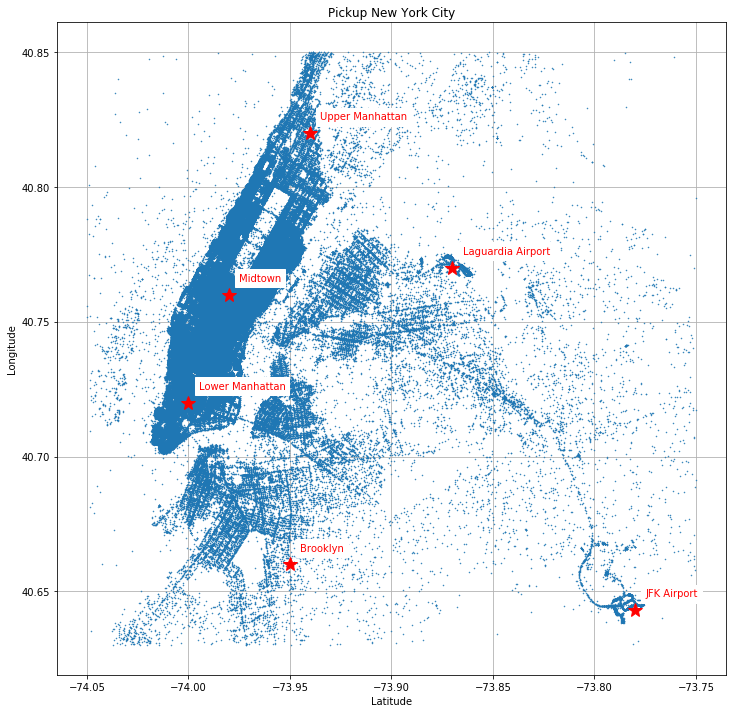

In [79]:
# Plotting Pickup
plot_lat_long (df1, landmarks, points='Pickup')

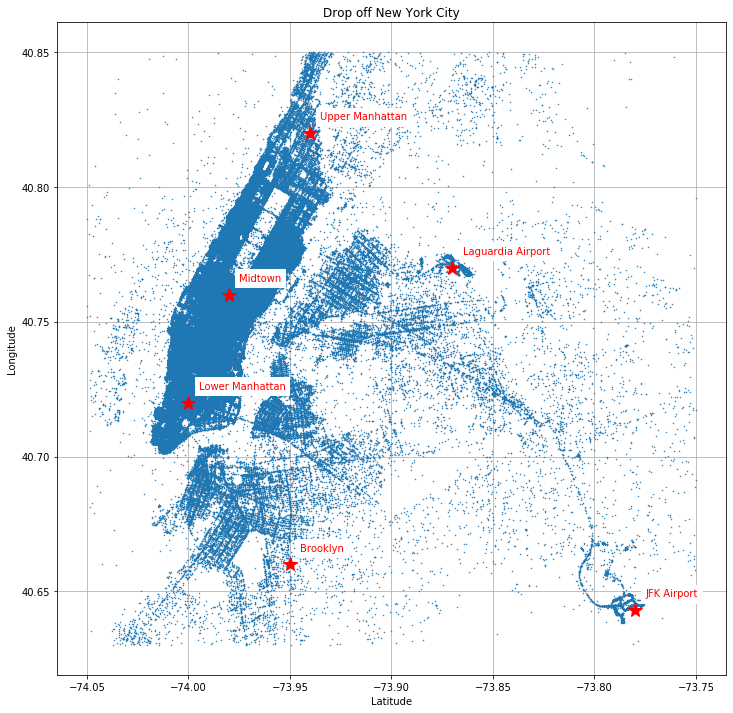

In [80]:
# Plotting Dropoff
plot_lat_long (df1, landmarks, points='Drop off')

### How the number of rides vary by day and hour?

In [81]:
# seperating pickup_datetime column's hour, day of week, day, month, year

df['hour']= df['pickup_datetime'].dt.hour
df['day_of_week']= df['pickup_datetime'].dt.dayofweek
df['day']= df['pickup_datetime'].dt.day
df['month']= df['pickup_datetime'].dt.month
df['year']= df['pickup_datetime'].dt.year

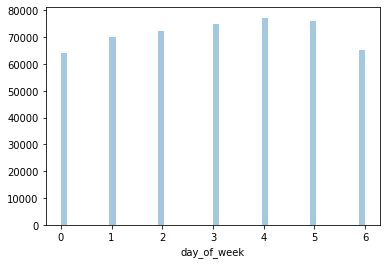

In [82]:
sns.distplot(df['day_of_week'], hist=True, kde=False)

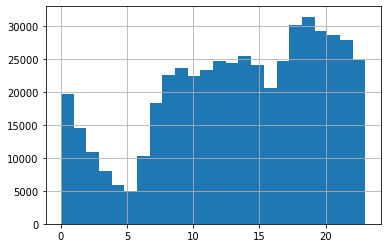

In [83]:
df['hour'].hist(bins=24)

# Data Preprocessing

In [84]:
df= df.drop(columns= ['hour', 'day_of_week', 'day', 'month', 'year'])

In [85]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

In [86]:
df= df.dropna()
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [87]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


## Fare amount

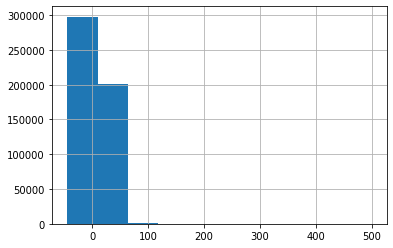

In [88]:
df['fare_amount'].hist()

In [89]:
# Removing the observations whose fare amount is less than 0 and greater than 100
df= df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]

# Passenger count

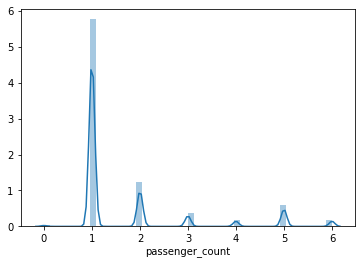

In [90]:
sns.distplot(df['passenger_count'])

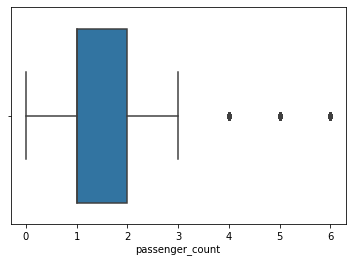

In [91]:
sns.boxplot(df['passenger_count'])

In [92]:
# replacing 0 passenger count with mode
df.loc[df['passenger_count']==0, 'passenger_count']= 1

In [93]:
df['passenger_count']

0         1
1         1
2         2
3         1
4         1
         ..
499995    1
499996    1
499997    1
499998    6
499999    1
Name: passenger_count, Length: 499760, dtype: int64

## Latitude and Longitude

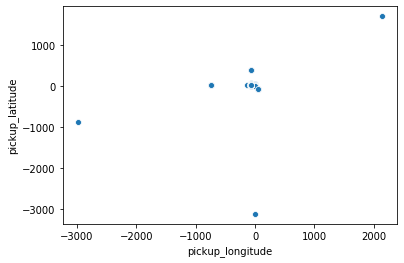

In [94]:
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df)

Its very clear that there are few wrong latitude and longitude values like -3000 etc which do not exist geographically. 

So such outliers must be removed

In [95]:
for long in ['pickup_longitude', 'dropoff_longitude']:
    df= df[(df[long]> min_long) & (df[long]< max_long)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df= df[(df[lat]> min_lat) & (df[lat]< max_lat)]

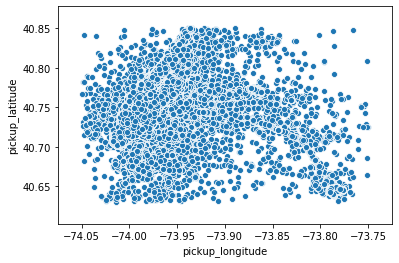

In [96]:
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df)

# Feature Engineering

In [97]:
# seperating pickup_datetime column's hour, day of week, day, month, year
df['hour']= df['pickup_datetime'].dt.hour
df['day_of_week']= df['pickup_datetime'].dt.dayofweek
df['day']= df['pickup_datetime'].dt.day
df['month']= df['pickup_datetime'].dt.month
df['year']= df['pickup_datetime'].dt.year

In [98]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day_of_week', 'day', 'month', 'year'],
      dtype='object')

In [99]:
df.loc[:4, ['pickup_datetime','hour', 'day_of_week', 'day', 'month', 'year']]

,pickup_datetime,hour,day_of_week,day,month,year
0,2009-06-15 17:26:21+00:00,17,0,15,6,2009
1,2010-01-05 16:52:16+00:00,16,1,5,1,2010
2,2011-08-18 00:35:00+00:00,0,3,18,8,2011
3,2012-04-21 04:30:42+00:00,4,5,21,4,2012
4,2010-03-09 07:51:00+00:00,7,1,9,3,2010


In [100]:
# Removing pickup datetime column
df=df.drop(columns=['pickup_datetime'])

## Geographical Location Features

In [101]:
# defining a function that calculates the distance between latitude and longitude points
# of two geographic locations

def dist_cal(lat1, long1, lat2, long2):
    # returning the Euclidean distance
    return (((lat1-lat2)**2 +(long1-long2)**2) **0.5)

In [102]:
# Applying it to df

df['distance']= dist_cal(df['pickup_latitude'],
                         df['pickup_longitude'],
                         df['dropoff_latitude'],
                         df['dropoff_longitude'])

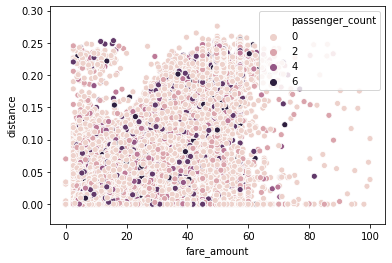

In [103]:
sns.scatterplot(x='fare_amount', y='distance', data=df, hue='passenger_count' )

df["passenger_count"]=pd.DataFrame(df["passenger_count"])
type(df["passenger_count"])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483438 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                483438 non-null  object 
 1   fare_amount        483438 non-null  float64
 2   pickup_longitude   483438 non-null  float64
 3   pickup_latitude    483438 non-null  float64
 4   dropoff_longitude  483438 non-null  float64
 5   dropoff_latitude   483438 non-null  float64
 6   passenger_count    483438 non-null  int64  
 7   hour               483438 non-null  int64  
 8   day_of_week        483438 non-null  int64  
 9   day                483438 non-null  int64  
 10  month              483438 non-null  int64  
 11  year               483438 non-null  int64  
 12  distance           483438 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 71.6+ MB


### Calculating the dropoff and pickup distances from the 3 airports

In [105]:
airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}

In [106]:
for airport in airports:
    df['pickup_dist_' + airport] = dist_cal(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])
    df['dropoff_dist_' + airport] = dist_cal(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0])

In [107]:
df[['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
    'dropoff_latitude', 'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport']].head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport
0,2009-06-15 17:26:21.0000001,-73.844311,40.721319,-73.841610,40.712278,0.101340,0.092710
1,2010-01-05 16:52:16.0000002,-74.016048,40.711303,-73.979268,40.782004,0.245731,0.242961
2,2011-08-18 00:35:00.00000049,-73.982738,40.761270,-73.991242,40.750562,0.234714,0.237050
3,2012-04-21 04:30:42.0000001,-73.987130,40.733143,-73.991567,40.758092,0.225895,0.240846
4,2010-03-09 07:51:00.000000135,-73.968095,40.768008,-73.956655,40.783762,0.225847,0.225878


In [108]:
df= df.drop(['key'], axis=1)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483438 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fare_amount                     483438 non-null  float64
 1   pickup_longitude                483438 non-null  float64
 2   pickup_latitude                 483438 non-null  float64
 3   dropoff_longitude               483438 non-null  float64
 4   dropoff_latitude                483438 non-null  float64
 5   passenger_count                 483438 non-null  int64  
 6   hour                            483438 non-null  int64  
 7   day_of_week                     483438 non-null  int64  
 8   day                             483438 non-null  int64  
 9   month                           483438 non-null  int64  
 10  year                            483438 non-null  int64  
 11  distance                        483438 non-null  float64
 12  pickup_dist_JFK_

# Feature Scaling

In [110]:
df_prescaled= df.copy()

In [111]:
df_scaled= df.drop(columns=['fare_amount'])

In [112]:
df_scaled.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day,month,year,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,6,2009,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,2010,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,-73.982738,40.761270,-73.991242,40.750562,2,0,3,18,8,2011,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,-73.987130,40.733143,-73.991567,40.758092,1,4,5,21,4,2012,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,-73.968095,40.768008,-73.956655,40.783762,1,7,1,9,3,2010,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228


In [113]:
df_scaled.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day_of_week', 'day',
       'month', 'year', 'distance', 'pickup_dist_JFK_Airport',
       'dropoff_dist_JFK_Airport', 'pickup_dist_Laguardia_Airport',
       'dropoff_dist_Laguardia_Airport', 'pickup_dist_Newark_Airport',
       'dropoff_dist_Newark_Airport'],
      dtype='object')

In [114]:
from sklearn.preprocessing import scale
df_scaled= scale(df_scaled)

In [115]:
type(df_scaled)

numpy.ndarray

In [116]:
columns= df.columns.tolist()
columns.remove('fare_amount')

In [117]:
df_scaled= pd.DataFrame(df_scaled, columns=columns, index= df.index)

In [118]:
df_scaled= pd.concat([df_scaled, df['fare_amount']], axis=1)

In [119]:
df_scaled

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day,month,year,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport,fare_amount
0,3.916896,-1.128227,4.151116,-1.365537,-0.526888,0.535442,-1.560801,-0.078219,-0.078187,-1.469611,-0.646405,-3.957854,-4.628070,-2.321151,-1.901119,3.494461,3.621417,4.5
1,-1.203464,-1.510227,-0.146055,1.083475,-0.526888,0.381408,-1.047515,-1.230176,-1.531625,-0.932852,1.292368,0.651855,0.631996,1.791541,-0.076296,-1.403329,0.144374,16.9
2,-0.210322,0.395464,-0.519838,-0.020874,0.239932,-2.083145,-0.020945,0.267369,0.503188,-0.396092,-0.529455,0.300110,0.425078,0.010540,0.438538,-0.137330,-0.519138,5.7
3,-0.341270,-0.677271,-0.529984,0.243605,-0.526888,-1.467007,1.005625,0.612956,-0.659562,0.140667,-0.207528,0.018578,0.557964,0.400941,0.412867,-0.482410,-0.456748,7.7
4,0.226261,0.652445,0.559839,1.145221,-0.526888,-1.004903,-1.047515,-0.769393,-0.950250,-0.932852,-0.369533,0.017033,0.033960,-0.590553,-0.964083,0.320629,0.773758,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,-0.092166,0.603461,0.265873,0.259245,-0.526888,0.689477,-0.020945,-0.999784,-0.368875,1.750944,-0.489768,0.281627,-0.205980,-0.160268,-0.603416,0.022689,0.256827,7.0
499996,-0.812409,-1.239249,-1.087975,-1.412111,-0.526888,-0.234731,-1.560801,-0.308610,0.793875,-0.932852,-0.633650,0.320116,0.503595,1.196515,1.584615,-1.004185,-1.294880,13.7
499997,-0.244520,-0.964534,2.438216,-1.762361,-0.526888,-2.083145,-1.560801,1.073739,0.503188,1.214185,1.598986,-0.170083,-3.318609,0.378361,-1.516937,-0.434363,1.993490,25.0
499998,0.031806,0.213987,0.137504,0.479248,3.307214,-0.234731,-1.560801,-0.423806,-1.531625,1.750944,-0.647392,-0.000379,0.032770,-0.294524,-0.460724,0.037758,0.201338,6.5


In [120]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483438 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   pickup_longitude                483438 non-null  float64
 1   pickup_latitude                 483438 non-null  float64
 2   dropoff_longitude               483438 non-null  float64
 3   dropoff_latitude                483438 non-null  float64
 4   passenger_count                 483438 non-null  float64
 5   hour                            483438 non-null  float64
 6   day_of_week                     483438 non-null  float64
 7   day                             483438 non-null  float64
 8   month                           483438 non-null  float64
 9   year                            483438 non-null  float64
 10  distance                        483438 non-null  float64
 11  pickup_dist_JFK_Airport         483438 non-null  float64
 12  dropoff_dist_JFK

# Deep Feedforward Model 

In [121]:
df= df_scaled.copy()
x= df.loc[:, df.columns!= 'fare_amount']
y=df.loc[:, 'fare_amount']

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test= train_test_split(x, y, test_size= 0.2)

In [123]:
from keras.models import Sequential
from keras.layers import Dense

In [124]:
model= Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [126]:
y_train.shape

(386750,)

In [127]:
x_train.shape

(386750, 17)

In [128]:
model.compile(loss='mse', optimizer= 'adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=1)

12086/12086 [==============================] - 21s 2ms/step - loss: 13.9414 - mse: 13.9414


# Analysing Results

Making prediction using a random sample from test set.

In [129]:
sample = x_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
idx = sample.index[0]

In [130]:
actual_fare = df_prescaled.loc[idx,'fare_amount']
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
hour = df_prescaled.loc[idx,'hour']
predicted_fare = model.predict(sample)[0][0]
rmse = np.sqrt(np.square(predicted_fare-actual_fare))

In [131]:
print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))  
print("Actual fare: ${:0.2f}".format(actual_fare))
print("Predicted fare: ${:0.2f}".format(predicted_fare))
print("RMSE: ${:0.2f}".format(rmse))

Trip Details: Sunday, 16:00hrs
Actual fare: $15.30
Predicted fare: $14.53
RMSE: $0.77


In [133]:
predict_random(df_prescaled, x_test, model)

Trip Details: Monday, 10:00hrs
Actual fare: $9.50
Predicted fare: $9.32
RMSE: $0.18
